In [1]:
import numpy as np
import matplotlib.pyplot as plt

Equação de Koutecky-Levich tirado da página 359 no Bard.

In [2]:
def current(E, A, k0, r1, r2, E0, f, D0, omega, nu, C0):
    """
    Calcula a corrente usando a equação de Koutecky-Levich.

    Parâmetros:
    E (float ou array): Potencial aplicado (V).
    A (float): Área do eletrodo (cm²).
    k0 (float): Constante de taxa da reação (cm/s).
    r1 (float): Raio interno do anel (cm).
    r2 (float): Raio externo do anel (cm).
    E0 (float): Potencial padrão da reação (V).
    f (float): Fator de simetria da reação.
    D0 (float): Coeficiente de difusão (cm²/s).
    omega (float): Velocidade angular do eletrodo (rad/s).
    nu (float): Viscosidade cinemática (cm²/s).
    C0 (float): Concentração da espécie eletroativa (mol/cm³).

    Retorna:
    float ou array: Corrente calculada (A).
    """
    R = 8.31  # Constante dos gases (J/(mol·K))
    F = 96485.33121  # Constante de Faraday (C/mol)
    T = 25 + 273  # Temperatura (K)
    n = 1  # Número de elétrons transferidos
    alpha = (r2 / r1)**3 - 1  # Fator geométrico

    # Constante de taxa dependente do potencial
    K = k0 * np.exp(-alpha * f * (E - E0))
    # Corrente cinética
    iK = F * A * K * C0
    # Corrente limite de difusão (equação de Levich)
    ilc = 0.62 * n * F * A * D0**(2/3) * omega**(1/2) * nu**(-1/6) * C0
    # Corrente total (equação de Koutecky-Levich)
    return (iK * ilc) / (iK + ilc)

In [3]:
# Parâmetros para a simulação
E = np.linspace(-0.01, 0.9, 50)  # Potencial aplicado (V)
omega = 0.3  # Velocidade angular 1 (rad/s)
omega2 = 1  # Velocidade angular 2 (rad/s)
nu = 0.5e6  # Viscosidade cinemática (cm²/s)
r1 = 0.1  # fator 1
r2 = 0.3  # fator 2
D0 = 1  # Coeficiente de difusão (cm²/s)
C0 = 1  # Concentração da espécie eletroativa (mol/cm³)
A = 1  # Área do eletrodo (cm²)
k0 = 1  # Constante de taxa da reação (cm/s)
f = 1  # Fator de simetria da reação
E0 = 0.5  # Potencial padrão da reação (V)

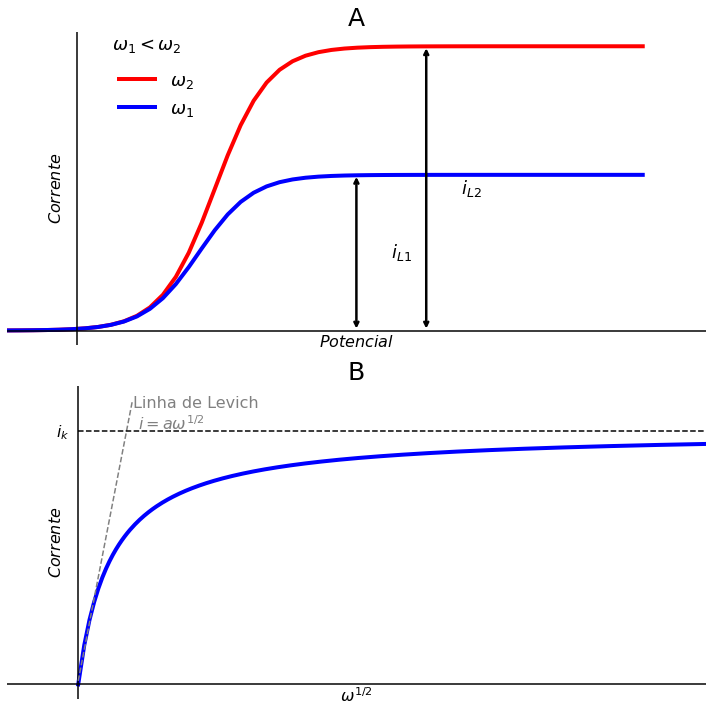

In [4]:
# Criação da figura e dos eixos
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Cálculo das correntes para as duas velocidades angulares
I = current(E, A, k0, r1, r2, E0, f, D0, omega, nu, C0)
I2 = current(E, A, k0, r1, r2, E0, f, D0, omega2, nu, C0)

# Plot do primeiro gráfico (Corrente vs Potencial)
axes[0].plot(E, I2, color='r', lw=4, label=r'$\omega_2$')
axes[0].plot(E, I, color='b', lw=4, label=r'$\omega_1$')

# Configurações do primeiro gráfico
axes[0].set_xlim(0.9, -0.1)  # Inverte o eixo x
axes[0].set_xticks([])  # Remove os valores numéricos do eixo x
axes[0].set_yticks([])  # Remove os valores numéricos do eixo y
axes[0].spines['top'].set_visible(False)  # Remove a borda superior
axes[0].spines['right'].set_visible(False)  # Remove a borda direita
axes[0].spines['bottom'].set_visible(False)  # Remove a borda inferior
axes[0].spines['left'].set_visible(False)  # Remove a borda esquerda
axes[0].axhline(0, linestyle="-", color="black")  # Linha horizontal em y=0
axes[0].axvline(E[-1] - 0.1, linestyle="-", color="black")  # Linha vertical em x=E[-1]-0.1
axes[0].annotate("$Corrente$", xy=(0.07, 0.5), xycoords="axes fraction",
                 fontsize=16, ha="center", va="center", rotation=90)
axes[0].annotate("$Potencial$", xy=(0.5, 0.01), xycoords="axes fraction",
                 fontsize=16, ha="center", va="center")

# Anotações para as correntes limites
axes[0].annotate("", xy=(E0 - 0.1, max(I)), xytext=(E0 - 0.1, 0),
                arrowprops=dict(arrowstyle="<->", color="black", lw=2.5))
axes[0].text(E0 - 0.15, max(I) / 2, "$i_{L1}$", fontsize=18, color="black", va="center")

axes[0].annotate("", xy=(E0 - 0.2, max(I2)), xytext=(E0 - 0.2, 0),
                arrowprops=dict(arrowstyle="<->", color="black", lw=2.5))
axes[0].text(E0 - 0.25, max(I2) / 2, "$i_{L2}$", fontsize=18, color="black", va="center")

# Legenda e título do primeiro gráfico
axes[0].legend(frameon=False, loc=(0.15, 0.7), fontsize=18)
axes[0].text(0.75, max(I2), "$\omega_1 < \omega_2$", fontsize=18, color="black", va="center")
axes[0].set_title('A', fontsize=25)

# Plot do segundo gráfico (Corrente vs omega^(1/2))
omega = np.linspace(0.1, 40, 1000)  # Velocidade angular (rad/s)
E1 = 1
F = 96485.33121  # Constante de Faraday (C/mol)
alpha = (r2/r1)**3 - 1
I = current(E1, A, k0, r1, r2, E0, f, D0, omega, nu, C0)  # Corrente calculada

axes[1].plot(omega**(1/2), I, color='b', lw=4)

# Configurações do segundo gráfico
axes[1].set_xlim(omega[0]**(1/2) - 0.68, omega[-1]**(1/2))  # Ajuste do eixo x
axes[1].set_xticks([])  # Remove os valores numéricos do eixo x
axes[1].set_yticks([])  # Remove os valores numéricos do eixo y
axes[1].spines['top'].set_visible(False)  # Remove a borda superior
axes[1].spines['right'].set_visible(False)  # Remove a borda direita
axes[1].spines['bottom'].set_visible(False)  # Remove a borda inferior
axes[1].spines['left'].set_visible(False)  # Remove a borda esquerda
axes[1].axhline(min(I), linestyle="-", color="black")  # Linha horizontal em y=min(I)
axes[1].axvline(omega[0]**(1/2), linestyle="-", color="black")  # Linha vertical em x=omega[0]^(1/2)
axes[1].annotate("$Corrente$", xy=(0.07, 0.5), xycoords="axes fraction",
                 fontsize=16, ha="center", va="center", rotation=90)
axes[1].annotate("$\omega^{1/2}$", xy=(0.5, 0.01), xycoords="axes fraction",
                 fontsize=16, ha="center", va="center")

# Ajuste de um polinômio de 1º grau para a linha de Levich
degree = 1  # Grau do polinômio
coeffs = np.polyfit(omega[:4]**(1/2), I[:4], degree)
poly_func = np.poly1d(coeffs)  # Função polinomial
axes[1].plot(omega[:16]**(1/2), poly_func(omega[:16]**(1/2)), '--', color='gray')
axes[1].annotate("Linha de Levich \n $i = a\omega^{1/2}$", xy=(0.18, 0.91), xycoords="axes fraction",
                 fontsize=16, color="gray", va="center")

# Linha horizontal para a corrente cinética (i_k)
ik = F * A * k0 * np.exp(-alpha * f * (E1 - E0)) * C0
axes[1].plot(omega**(1/2), ik * np.ones(len(omega)), '--', color='black')
axes[1].annotate("$i_k$", xy=(0.08, 0.85), xycoords="axes fraction",
                 fontsize=16, ha="center", va="center")

# Título do segundo gráfico
axes[1].set_title('B', fontsize=25)

# Ajuste de layout e salvamento da figura
plt.tight_layout()
plt.savefig('Levich.png', dpi=300)

In [23]:
# Parâmetros para a simulação
E = np.linspace(-0.01, 0.9, 50)  # Potencial aplicado (V)
omega = 0.3  # Velocidade angular 1 (rad/s)
omega2 = 1  # Velocidade angular 2 (rad/s)
nu = 0.5e6  # Viscosidade cinemática (cm²/s)
r1 = 0.1  # fator 1
r2 = 0.3  # fator 2
r3 = 0.5
D0 = 1  # Coeficiente de difusão (cm²/s)
C0 = 1  # Concentração da espécie eletroativa (mol/cm³)
A = 1  # Área do eletrodo (cm²)
k0 = 1  # Constante de taxa da reação (cm/s)
f = 1  # Fator de simetria da reação
E0 = 0.5  # Potencial padrão da reação (V)

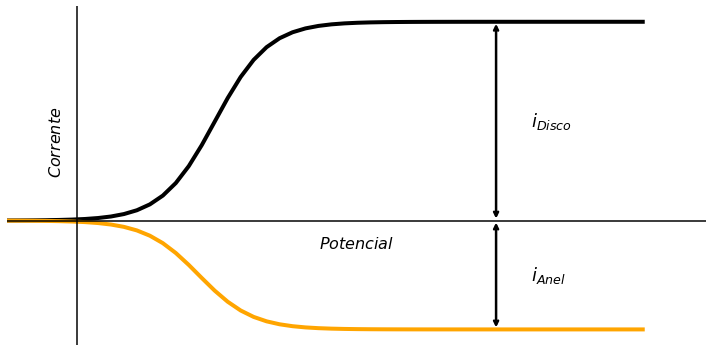

In [30]:
# Criação da figura e dos eixos
fig, axes = plt.subplots(1, 1, figsize=(10, 5))

# Cálculo das correntes para as duas velocidades angulares
I = current(E, A, k0, r1, r2, E0, f, D0, omega, nu, C0)
I2 = current(E, A, k0, r1, r2, E0, f, D0, omega2, nu, C0)

# Plot do primeiro gráfico (Corrente vs Potencial)
axes.plot(E, I2, color='black', lw=4)
axes.plot(E, -I, color='orange', lw=4)

# Configurações do primeiro gráfico
axes.set_xlim(0.9, -0.1)  # Inverte o eixo x
axes.set_xticks([])  # Remove os valores numéricos do eixo x
axes.set_yticks([])  # Remove os valores numéricos do eixo y
axes.spines['top'].set_visible(False)  # Remove a borda superior
axes.spines['right'].set_visible(False)  # Remove a borda direita
axes.spines['bottom'].set_visible(False)  # Remove a borda inferior
axes.spines['left'].set_visible(False)  # Remove a borda esquerda
axes.axhline(0, linestyle="-", color="black")  # Linha horizontal em y=0
axes.axvline(E[-1] - 0.1, linestyle="-", color="black")  # Linha vertical em x=E[-1]-0.1
axes.annotate("$Corrente$", xy=(0.07, 0.6), xycoords="axes fraction",
                 fontsize=16, ha="center", va="center", rotation=90)
axes.annotate("$Potencial$", xy=(0.5, 0.3), xycoords="axes fraction",
                 fontsize=16, ha="center", va="center")

# Anotações para as correntes limites
axes.annotate("", xy=(E0 - 0.3, -max(I)), xytext=(E0 - 0.3, 0),
                arrowprops=dict(arrowstyle="<->", color="black", lw=2.5))
axes.text(E0 - 0.35, -max(I) / 2, "$i_{Anel}$", fontsize=18, color="black", va="center")

axes.annotate("", xy=(E0 - 0.3, max(I2)), xytext=(E0 - 0.3, 0),
                arrowprops=dict(arrowstyle="<->", color="black", lw=2.5))
axes.text(E0 - 0.35, max(I2) / 2, "$i_{Disco}$", fontsize=18, color="black", va="center")

plt.tight_layout()
plt.savefig('RRE-Levich.png', dpi=300)